In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

import theano

data=np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])
t=np.array([94.3, 15.7, 62.9, 126, 5.24, 31.4, 1.05, 1.05, 2.1, 10.5])

np.random.seed(42)
pm.set_tt_rng(42)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [9]:
with pm.Model() as hierarchical_model:
    a=pm.Exponential('a',lam=1)
    b=pm.Gamma('b',alpha=0.1, beta=1)

    q1=pm.Gamma('q1',alpha=a, beta=b)
    q2=pm.Gamma('q2',alpha=a, beta=b)
    q3=pm.Gamma('q3',alpha=a, beta=b)
    q4=pm.Gamma('q4',alpha=a, beta=b)
    q5=pm.Gamma('q5',alpha=a, beta=b)
    q6=pm.Gamma('q6',alpha=a, beta=b)
    q7=pm.Gamma('q7',alpha=a, beta=b)
    q8=pm.Gamma('q8',alpha=a, beta=b)
    q9=pm.Gamma('q9',alpha=a, beta=b)
    q10=pm.Gamma('q10',alpha=a, beta=b)
    
    x1=pm.Poisson('x1',mu=q1*t[0], observed=True)
    x2=pm.Poisson('x2',mu=q2*t[1], observed=True)
    x3=pm.Poisson('x3',mu=q3*t[2], observed=True)
    x4=pm.Poisson('x4',mu=q4*t[3], observed=True)
    x5=pm.Poisson('x5',mu=q5*t[4], observed=True)
    x6=pm.Poisson('x6',mu=q6*t[5], observed=True)
    x7=pm.Poisson('x7',mu=q7*t[6], observed=True)
    x8=pm.Poisson('x8',mu=q8*t[7], observed=True)
    x9=pm.Poisson('x9',mu=q9*t[8], observed=True)
    x10=pm.Poisson('x10',mu=q10*t[9], observed=True)    
    
    step = pm.Metropolis()
    trace = pm.sample(15000, step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [q10]
>Metropolis: [q9]
>Metropolis: [q8]
>Metropolis: [q7]
>Metropolis: [q6]
>Metropolis: [q5]
>Metropolis: [q4]
>Metropolis: [q3]
>Metropolis: [q2]
>Metropolis: [q1]
>Metropolis: [b]
>Metropolis: [a]
Sampling 2 chains: 100%|██████████| 31000/31000 [01:07<00:00, 459.32draws/s]
The number of effective samples is smaller than 10% for some parameters.


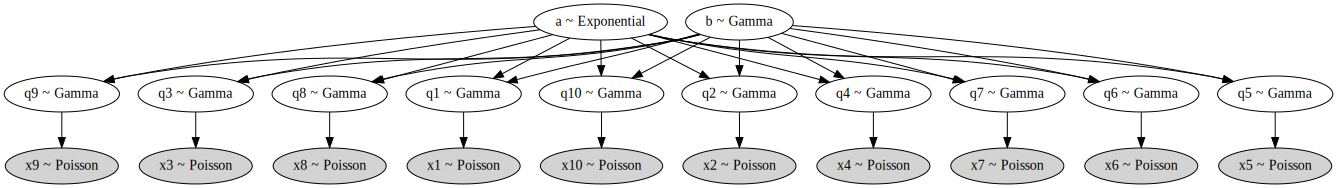

In [28]:
pm.model_to_graphviz(hierarchical_model)

In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,0.441568,0.172159,0.003554,0.145403,0.777353,2197.010773,1.000075
b,1.589231,1.109388,0.023896,0.012765,3.694117,2162.999591,0.999971
q1,0.014952,0.012544,0.000159,0.000011,0.039513,6150.069126,1.000001
q2,0.083505,0.069207,0.000979,0.000120,0.222126,6136.077124,1.000003
q3,0.022113,0.018898,0.000241,0.000027,0.059030,6312.460015,1.000016
q4,0.011289,0.009532,0.000121,0.000053,0.029894,6059.152002,1.000124
q5,0.214455,0.182431,0.002261,0.000569,0.579977,6164.287597,1.000035
q6,0.043860,0.037146,0.000452,0.000025,0.117798,6317.025509,1.000097
q7,0.619503,0.592480,0.008424,0.000280,1.770062,5061.744005,1.000002
q8,0.623252,0.590627,0.008882,0.000642,1.774860,4335.053817,1.000110


In [14]:
from sklearn.metrics import mean_squared_error

In [13]:
from scipy.stats import gamma
from scipy.stats import poisson

q=gamma.rvs(a=0.441568, scale=1.589231, size=1)
x=np.zeros(10)
for j in range(0, 10):
    x[j]=poisson.rvs(mu=q*t[j], size=1)
x=np.array(x)    
mean_squared_error(x, data)

104.6